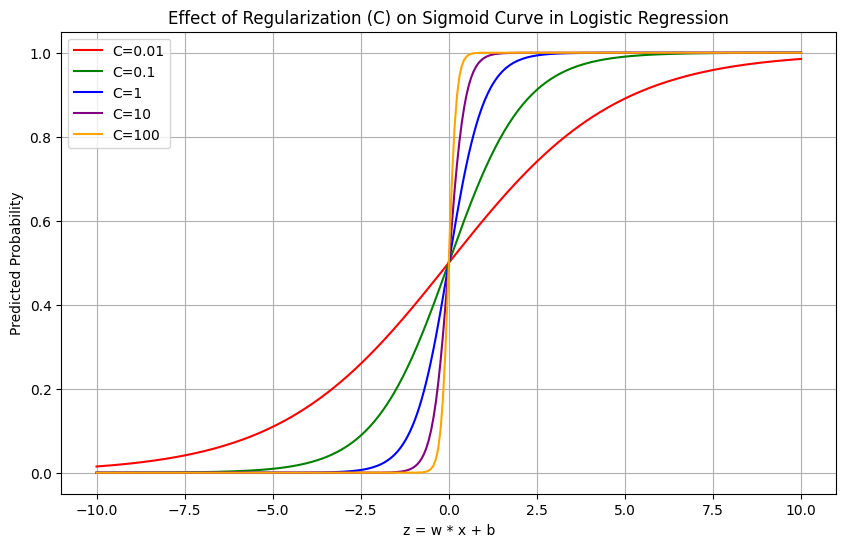

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Tạo dữ liệu mẫu với một đặc trưng
X = np.linspace(-10, 10, 100).reshape(-1, 1)  # Tạo dữ liệu từ -10 đến 10
y = (X > 0).astype(int).ravel()  # Nhãn 0 nếu X <= 0, nhãn 1 nếu X > 0

# Các giá trị C khác nhau để thử nghiệm
C_values = [0.01, 0.1, 1, 10, 100]
colors = ['red', 'green', 'blue', 'purple', 'orange']

# Thiết lập biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ sigmoid cho mỗi giá trị C
for i, C in enumerate(C_values):
    # Khởi tạo Logistic Regression với giá trị C
    model = LogisticRegression(C=C, solver='liblinear')
    model.fit(X, y)

    # Dự đoán xác suất
    X_test = np.linspace(-10, 10, 300).reshape(-1, 1)
    y_prob = model.predict_proba(X_test)[:, 1]  # Xác suất thuộc lớp 1

    # Vẽ đường sigmoid
    plt.plot(X_test, y_prob, color=colors[i], label=f"C={C}")

# Thiết lập nhãn và tiêu đề
plt.xlabel("z = w * x + b")
plt.ylabel("Predicted Probability")
plt.title("Effect of Regularization (C) on Sigmoid Curve in Logistic Regression")
plt.legend()
plt.grid()
plt.show()

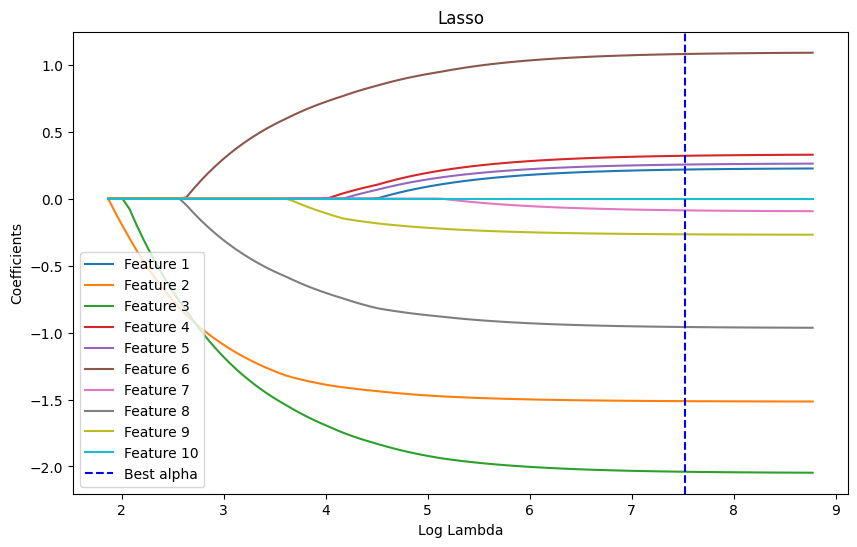

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import train_test_split

# Sử dụng dữ liệu mẫu của bạn
X = np.random.rand(100, 10)  # 100 mẫu, 10 đặc trưng
y = X.dot(np.random.randn(10)) + 0.1 * np.random.randn(100)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Fit mô hình LassoCV trên tập huấn luyện
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(X_train, y_train)

# Lấy các giá trị alpha và hệ số tương ứng
alphas = lasso_cv.alphas_  # các giá trị alpha trong quá trình cross-validation
coefs = []

# Huấn luyện mô hình Lasso cho từng giá trị alpha và lưu lại hệ số hồi quy
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

# Plot biểu đồ hệ số hồi quy so với log(alpha)
plt.figure(figsize=(10, 6))
# màu cho các đường biểu diễn
colors = plt.cm.tab10(np.linspace(0, 1, X.shape[1]))

coefs = np.array(coefs).T  # chuyển đổi để dễ vẽ đồ thị
for i in range(coefs.shape[0]):
    plt.plot(-np.log(alphas), coefs[i, :],
             color=colors[i], label=f'Feature {i+1}')

plt.xlabel('Log Lambda')
plt.ylabel('Coefficients')
plt.title('Lasso')
plt.axvline(x=-np.log(lasso_cv.alpha_), color='blue',
            linestyle='--', label='Best alpha')
plt.legend(loc='best', frameon=True)
plt.show()

In [7]:
-np.log(lasso_cv.alpha_)

7.520234068484836

In [9]:
coefs.shape

(10, 100)